<a href="https://colab.research.google.com/github/Mr-big-cake/Fundamental-algorithms/blob/master/Lab_7%7C/%D0%98%D0%98_%D0%9B%D1%80_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная №7

In [ ]:
import math
import copy
import numpy as np
import random
from matplotlib import pyplot as plt
from enum import Enum

In [ ]:
def density_Fisrt(x):
  return (-2*x + 8) / 9  if 1 < x < 4 else 0
def density_Second(x, lam = 1):
  return lam*math.exp(-lam*x) if x >= 0 else 0
def distirty_Normal(x , m = 0.35 , d = 1):
    return (math.exp((x - m)**2/(-2*d**2))/(d*(2*math.pi)**0.5))

##1 Метод Rejection sampling

In [ ]:
'''
Rejection Sampling для распределения
f = (-2*x + 8) / 9 if 1 < x < 4 else 0
count - количество семплируемых точек
m - мат. ожидание
d - дисперсия
c - коэффициент умножения
'''
def rejection_sampling_First(count = 400, m = 1, d = 1.5, c = 2.55):
  result = []
  while len(result) < count:
    x = np.random.normal(m, 1.2)
    u = np.random.uniform(0, c * distirty_Normal(x, m, d))
    px = density_Fisrt(x)
    if (isinstance(px, complex) and (px.imag != 0)): continue 
    if(px > u):
      result.append(x)
  return result

'''
Rejection Sampling для Экспоненциального распределения
count - количество семплируемых точек
m - мат. ожидание
d - дисперсия
c - коэффициент умножения
'''
def rejection_sampling_Second(count = 400, m = 0, d = 1.5, c = 3.6):
  result = []
  while len(result) < count:
    x = np.random.normal(m, 1)
    u = np.random.uniform(0, c * distirty_Normal(x, m, d))
    px = density_Second(x)
    if (isinstance(px, complex) and (px.imag != 0)): continue 
    if(px > u):
      result.append(x)
  return result

Демонстрации работы для распределения f = (-2*x + 8) / 9  if 1 < x < 4 else 0

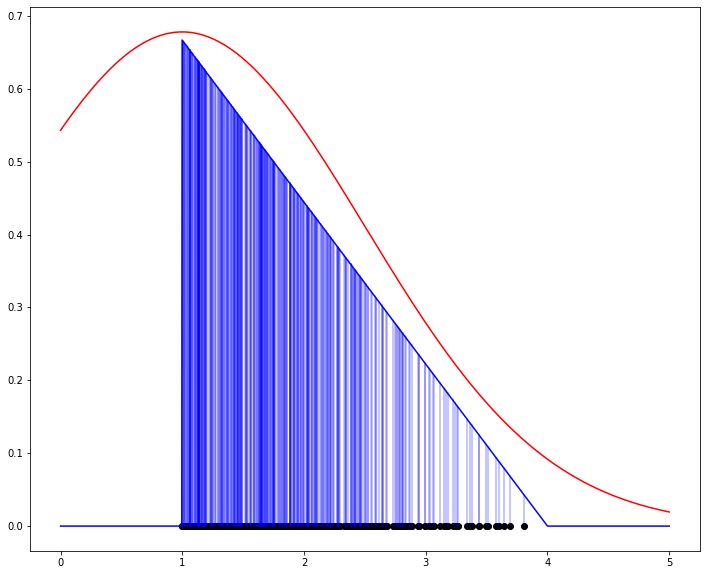

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
x = np.linspace(0, 5, 1000)
c = 2.55
mean = 1
d = 1.5
y_red = [c*distirty_Normal(xi, mean, d) for xi in x]
y_blue = [density_Fisrt(xi) for xi in x]
sample = rejection_sampling_First(400, mean, c, d)
plt.plot(x, y_red, color = 'red')
plt.plot(x, y_blue, color = 'blue')

for i in range(len(sample)):
  plt.plot([sample[i], sample[i]],  np.linspace(0, density_Fisrt(sample[i]), 2), color = 'blue', alpha=0.3)
  ax.scatter(sample[i], 0, color = 'black')
plt.show()

Демонстрация работы для Экспоненциального распределения

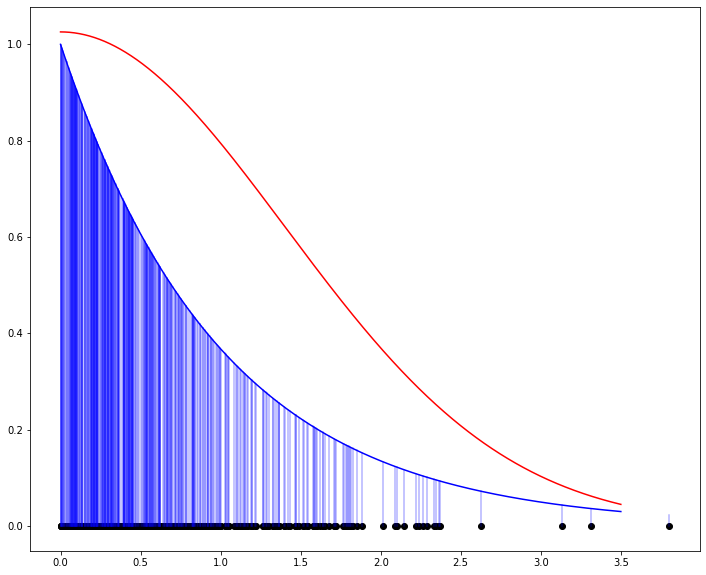

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
x = np.linspace(0, 3.5, 1000)
c = 3.6
mean = 0
d = 1.4
y_red = [c*distirty_Normal(xi, mean, d) for xi in x] 
y_blue = [density_Second(xi) for xi in x] 
sample = rejection_sampling_Second(400, mean, d, c)
plt.plot(x, y_red, color = 'red')
plt.plot(x, y_blue, color = 'blue')

for i in range(len(sample)):
  plt.plot([sample[i], sample[i]],  np.linspace(0, density_Second(sample[i]), 2), color = 'blue', alpha=0.3)
  ax.scatter(sample[i], 0, color = 'black')
plt.show()

##2 Метод Markov chain Monte Carlo

In [ ]:
'''
metropolis_Hastings_First - MCMC для распределения
y = {-cos x; pi < x < 1.5pi }
count - количество семплируемых точек
m - мат. ожидание
d - дисперсия
'''
def metropolis_Hastings_First(count = 200, d = 1):
  result = [np.random.uniform(1, 3)]
  while len(result) < count :
    xt = result[-1]
    xi = np.random.normal(xt, d)
    a = density_Fisrt(xi)/density_Fisrt(xt)
    if np.random.binomial(1,min(a,1),1)[0] == 1:
      result.append(xi)
    elif result[-1] != xt: result.append(xt)
  return result
  
'''
metropolis_Hastings_Second - MCMC для Экспоненциального распределения
count - количество семплируемых точек
m - мат. ожидание
d - дисперсия
'''
def metropolis_Hastings_Second(count = 200, d = 1):
  result = [np.random.uniform(0, 2.5)]
  while len(result) < count :
    xt = result[-1]
    xi = np.random.normal(xt, d)
    a = density_Second(xi)/density_Second(xt)
    if (isinstance(a, complex) and (a.imag != 0)): continue
    if np.random.binomial(1,min(a,1),1)[0] == 1:
      result.append(xi)
    elif result[-1] != xt: result.append(xt)
  return result

Демонстрации работы для распределения f = (-2*x + 8) / 9 if 1 < x < 4 else 0

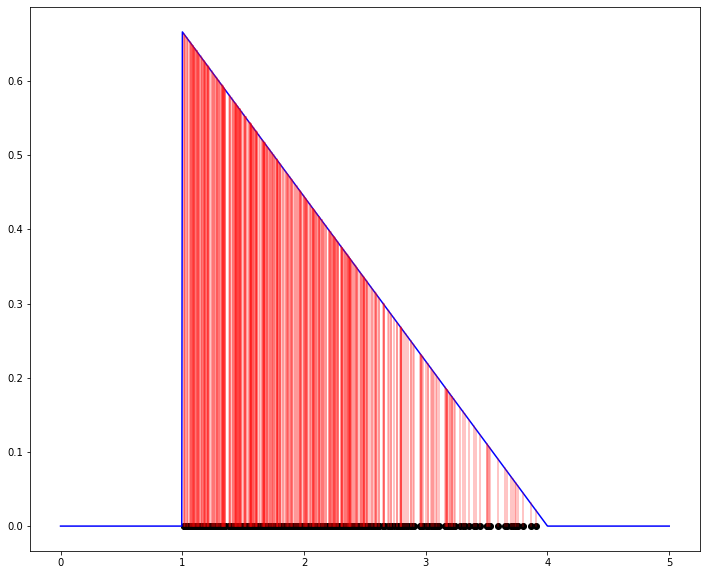

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
x = np.linspace(0, 5, 1000)
y_blue = [density_Fisrt(xi) for xi in x]
sample = metropolis_Hastings_First(400, 0.3)
plt.plot(x, y_blue, color = 'blue')

for i in range(len(sample)):
  plt.plot([sample[i], sample[i]],  np.linspace(0, density_Fisrt(sample[i]), 2), color = 'red', alpha=0.3)
  ax.scatter(sample[i], 0, color = 'black')
plt.show()

Демонстрации работы для Экспоненциального распределения

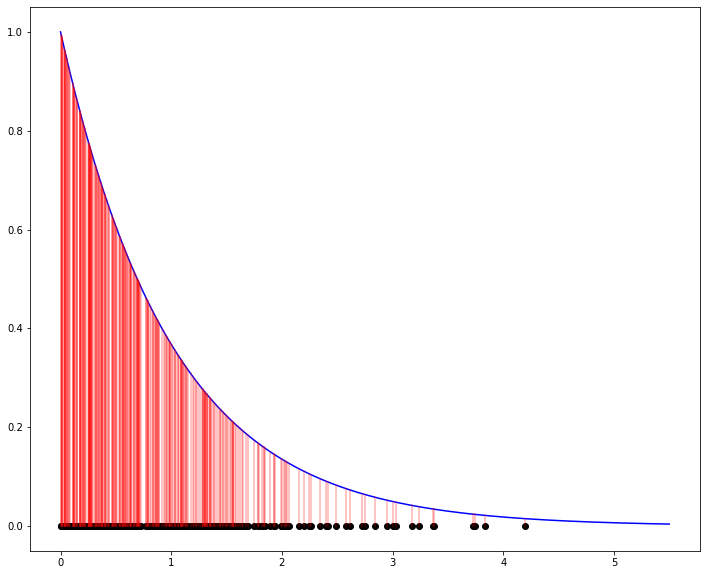

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
x = np.linspace(0, 5.5, 1000)
y_blue = [density_Second(xi) for xi in x]
sample = metropolis_Hastings_Second(300, 0.5)
plt.plot(x, y_blue, color = 'blue')

for i in range(len(sample)):
  plt.plot([sample[i], sample[i]],  np.linspace(0, density_Second(sample[i]), 2), color = 'red', alpha=0.3)
  ax.scatter(sample[i], 0, color = 'black')
plt.show()